In [1]:
import bioframe
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Comparing abundances from STAR vs Kallisto

In [2]:
proj = '/project/fudenber_735/collaborations/karissa_2022/'
ensembl_relations = "/project/fudenber_735/genomes/mm10/ensembl/ensembl_relational_downloads"
elphege_proj_files = "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652"

In [3]:
meta = "RNAseq/fastq/KHRNA_Libraries_Nora-Fudenberg.csv"
Star_feature_counts = 'RNAseq/STAR_Gencode_alignment/20220304_featureCounts_EA18-1_dTAG13-24h.csv'
kallisto = "RNAseq-mapped/kallisto"

In [4]:
metadb = pd.read_csv(proj + meta, delimiter=',')

In [6]:
star_counts = pd.read_csv(proj + Star_feature_counts)
kallisto_counts = pd.read_csv(proj + "RNAseq-mapped/tximport/gene-counts.csv") # actually kallisto counts aggreggated by genes using tximport

star_counts = star_counts.rename(columns={'Unnamed: 0' : 'gene'})
kallisto_counts = kallisto_counts.rename(columns={'Unnamed: 0' : 'gene'})

In [77]:
print(kallisto_counts.shape)
kallisto_counts.head(5)

(29723, 7)


,gene,KHRNA22,KHRNA23,KHRNA50,KHRNA25,KHRNA26,KHRNA51
0,ENSMUSG00000000001,5369.000000,5555.000000,3383.000000,4479.000000,4127.000000,3324.0
1,ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,ENSMUSG00000000028,2011.881893,2225.000000,1346.000000,1730.000000,1735.000000,1297.0
3,ENSMUSG00000000031,48.000000,22.000000,12.000000,98.000000,53.000000,77.0
4,ENSMUSG00000000037,215.657698,179.033615,209.304279,149.696089,103.686632,210.0


In [8]:
# removing the version for gene names and other formatting
star_counts['gene'] = star_counts['gene'].map(lambda x : x.strip().split('.')[0])

print(star_counts.shape)
star_counts.head(5)

(55421, 7)


,gene,KHRNA22,KHRNA23,KHRNA25,KHRNA26,KHRNA50,KHRNA51
0,ENSMUSG00000000001,5220,5438,4263,4021,3298,3160
1,ENSMUSG00000000003,0,0,0,0,0,0
2,ENSMUSG00000000028,1972,2195,1655,1709,1328,1246
3,ENSMUSG00000000031,41,18,72,44,10,70
4,ENSMUSG00000000037,174,140,132,107,170,166


(0.0, 10000.0)

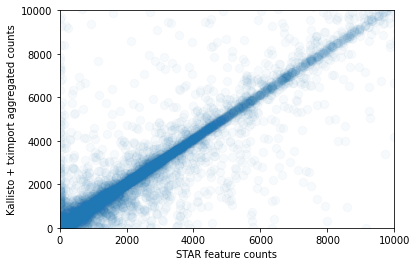

In [9]:
counts = star_counts.merge(kallisto_counts, 
                           how = 'inner', 
                           on='gene', 
                           suffixes=("_star", "_kallisto"))

plt.xlabel("STAR feature counts")
plt.ylabel("Kallisto + tximport aggregated counts")
plt.scatter(counts['KHRNA22_star'], counts['KHRNA22_kallisto'], s=70, alpha=0.03)
plt.xlim(0, 10000)
plt.ylim(0, 10000)

## notes:

 - see if there are any papers that benchmark these (+other aligners) to see if there are differences in the tools causing this
 - 

(28906, 13)

In [41]:
counts.head(5)

,gene,KHRNA22_star,KHRNA23_star,KHRNA25_star,KHRNA26_star,KHRNA50_star,KHRNA51_star,KHRNA22_kallisto,KHRNA23_kallisto,KHRNA50_kallisto,KHRNA25_kallisto,KHRNA26_kallisto,KHRNA51_kallisto
0,ENSMUSG00000000001,5220,5438,4263,4021,3298,3160,5369.000000,5555.000000,3383.000000,4479.000000,4127.000000,3324.0
1,ENSMUSG00000000003,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,ENSMUSG00000000028,1972,2195,1655,1709,1328,1246,2011.881893,2225.000000,1346.000000,1730.000000,1735.000000,1297.0
3,ENSMUSG00000000031,41,18,72,44,10,70,48.000000,22.000000,12.000000,98.000000,53.000000,77.0
4,ENSMUSG00000000037,174,140,132,107,170,166,215.657698,179.033615,209.304279,149.696089,103.686632,210.0


In [ ]:
## possible difference:
# try to redo tximport for kallisto results using gencode.vM23 for gene aggregation: https://www.bioconductor.org/help/course-materials/2019/CSAMA/materials/labs/lab-03-rnaseq/rnaseqGene_CSAMA2019.html

In [ ]:
# What is different between these?
# To what extent do the DE genes after 24 hours between dNipbl and dCTCF overlap? maybe dWapl? 

# Comparing DEGs between different depletions

 - To what extent do the DE genes after 24 hours between dNipbl and dCTCF overlap? maybe dWapl? 
    - scatterplots (for abundances of WTs, dNipbl-24h, dCTCF-24h) , PCA?

In [5]:
# DESeq2 results for 24hour depletion treatment for CTCF and NipBl 
dCTCF = pd.read_csv('/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/deseq-mm10-results/pairwise_deseq_wt_CTCF_AID_auxin1day.csv')
dNipBl = pd.read_csv(proj + 'RNAseq-mapped/DE-results/pairwise_deseq_wt_dTAG_13_24h_vs_DMSO_24h.csv')

dCTCF = dCTCF.rename(columns={'Unnamed: 0' : 'gene'})
dNipBl = dNipBl.rename(columns={'Unnamed: 0' : 'gene'})

In [6]:
print(dCTCF.shape)
print(dNipBl.shape)
dCTCF.head(10)

(29723, 7)
(29723, 7)


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSMUSG00000000001,4946.921561,-0.030823,0.252413,-0.122113,0.902809,0.999976
1,ENSMUSG00000000003,0.000000,NaN,NaN,NaN,NaN,NaN
2,ENSMUSG00000000028,2277.235216,-0.091748,0.176626,-0.519447,0.603449,0.999976
3,ENSMUSG00000000031,27.699104,-0.329884,0.641314,-0.514388,0.606981,0.999976
4,ENSMUSG00000000037,330.518198,2.020011,0.509448,3.965098,0.000073,0.007284
5,ENSMUSG00000000049,0.000000,NaN,NaN,NaN,NaN,NaN
6,ENSMUSG00000000056,670.116954,-0.126357,0.185398,-0.681547,0.495525,0.999976
7,ENSMUSG00000000058,15.935184,0.737133,0.740699,0.995185,0.319646,0.999976
8,ENSMUSG00000000078,1669.312483,0.262253,0.307144,0.853846,0.393190,0.999976
9,ENSMUSG00000000085,794.738531,-0.076647,0.278078,-0.275632,0.782831,0.999976


In [7]:
both = dCTCF.merge(dNipBl, on='gene', how='inner', suffixes=('_CTCF', '_NipBl'))

In [8]:
both.head(10)

,gene,baseMean_CTCF,log2FoldChange_CTCF,lfcSE_CTCF,stat_CTCF,pvalue_CTCF,padj_CTCF,baseMean_NipBl,log2FoldChange_NipBl,lfcSE_NipBl,stat_NipBl,pvalue_NipBl,padj_NipBl
0,ENSMUSG00000000001,4946.921561,-0.030823,0.252413,-0.122113,0.902809,0.999976,4292.214151,-0.101523,0.100625,-1.008924,0.313011,0.724979
1,ENSMUSG00000000003,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,ENSMUSG00000000028,2277.235216,-0.091748,0.176626,-0.519447,0.603449,0.999976,1694.940934,-0.071342,0.117240,-0.608512,0.542848,0.868196
3,ENSMUSG00000000031,27.699104,-0.329884,0.641314,-0.514388,0.606981,0.999976,50.489910,1.723420,0.416543,4.137436,0.000035,0.001251
4,ENSMUSG00000000037,330.518198,2.020011,0.509448,3.965098,0.000073,0.007284,196.342074,-0.561242,0.448194,-1.252232,0.210485,0.612838
5,ENSMUSG00000000049,0.000000,NaN,NaN,NaN,NaN,NaN,0.163406,1.103908,4.080473,0.270534,0.786749,NaN
6,ENSMUSG00000000056,670.116954,-0.126357,0.185398,-0.681547,0.495525,0.999976,871.917098,0.379189,0.116249,3.261877,0.001107,0.020174
7,ENSMUSG00000000058,15.935184,0.737133,0.740699,0.995185,0.319646,0.999976,0.156952,1.103908,4.080473,0.270534,0.786749,NaN
8,ENSMUSG00000000078,1669.312483,0.262253,0.307144,0.853846,0.393190,0.999976,969.549826,-0.038554,0.137075,-0.281264,0.778508,0.954018
9,ENSMUSG00000000085,794.738531,-0.076647,0.278078,-0.275632,0.782831,0.999976,456.948047,0.125960,0.175320,0.718458,0.472475,0.833149


In [9]:
sig_CTCF = both.loc[np.where(both['padj_CTCF'] < 0.05)]
sig_CTCF.shape

(263, 13)

In [10]:
sig_CTCF.head(4)

,gene,baseMean_CTCF,log2FoldChange_CTCF,lfcSE_CTCF,stat_CTCF,pvalue_CTCF,padj_CTCF,baseMean_NipBl,log2FoldChange_NipBl,lfcSE_NipBl,stat_NipBl,pvalue_NipBl,padj_NipBl
4,ENSMUSG00000000037,330.518198,2.020011,0.509448,3.965098,0.000073,0.007284,196.342074,-0.561242,0.448194,-1.252232,0.210485,0.612838
31,ENSMUSG00000000184,299.191108,-0.817306,0.222499,-3.673303,0.000239,0.019212,37.958103,1.926668,0.477647,4.033663,0.000055,0.001802
87,ENSMUSG00000000489,454.070221,1.146653,0.299644,3.826721,0.000130,0.011763,128.984440,1.184506,0.281402,4.209295,0.000026,0.000967
269,ENSMUSG00000001510,91.304966,1.685750,0.346972,4.858465,0.000001,0.000212,27.923476,0.862873,0.471301,1.830832,0.067126,0.338418


In [11]:
sig_Nipbl = both.loc[np.where(both['padj_NipBl'] < 0.05)]
sig_Nipbl.shape

(1061, 13)

In [12]:
sig_Nipbl.head(3)

,gene,baseMean_CTCF,log2FoldChange_CTCF,lfcSE_CTCF,stat_CTCF,pvalue_CTCF,padj_CTCF,baseMean_NipBl,log2FoldChange_NipBl,lfcSE_NipBl,stat_NipBl,pvalue_NipBl,padj_NipBl
3,ENSMUSG00000000031,27.699104,-0.329884,0.641314,-0.514388,0.606981,0.999976,50.489910,1.723420,0.416543,4.137436,0.000035,0.001251
6,ENSMUSG00000000056,670.116954,-0.126357,0.185398,-0.681547,0.495525,0.999976,871.917098,0.379189,0.116249,3.261877,0.001107,0.020174
14,ENSMUSG00000000120,581.938368,0.274466,0.348485,0.787598,0.430932,0.999976,2152.339630,0.689070,0.187539,3.674269,0.000239,0.005919


In [13]:
sig_Nipbl_abundance = sig_Nipbl.merge(kallisto_counts,
                                       on='gene',
                                       how='left')
sig_Nipbl_abundance.head(5)

NameError: name 'kallisto_counts' is not defined

In [ ]:
plt.title('Aggregated gene abundance for significant DEGs after 24hours dNipbl')
plt.xlabel('Gene counts DMSO 24h')
plt.ylabel('Gene counts dTAG-13 24h')

for wt, t in zip(metadb.loc[metadb['treatment'] == 'DMSO 24h']['library'], metadb.loc[metadb['treatment'] == 'dTAG-13 24h']['library']):
    print(t)
    plt.scatter(sig_Nipbl_abundance[wt], 
                sig_Nipbl_abundance[t], 
                s=20, alpha=0.1, color='blue')

plt.xlim(0,30000)
plt.ylim(0,30000)

Looks like there are more up-regulated genes following depletion of NipBl than down-regulated genes

 - include non-sig background in grey

In [14]:
ctcf_kallisto_counts = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/deseq-mm10-results/tximport/gene-counts.csv")
ctcf_kallisto_counts = ctcf_kallisto_counts.rename(columns={'Unnamed: 0' : 'gene'})

ctcf_meta = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/metadata/sample2condition.csv")

In [15]:
sig_ctcf = both.loc[np.where(both['padj_CTCF'] < 0.05)]

print(sig_ctcf.shape)
sig_ctcf_abundance = sig_ctcf.merge(ctcf_kallisto_counts,
                                       on='gene',
                                       how='left')

(263, 13)


SRR5517515
SRR5517501
SRR5517518
SRR5517506
SRR5517521
SRR5517511


(0.0, 10000.0)

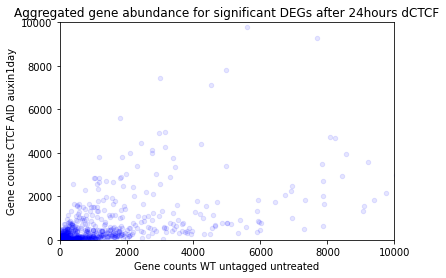

In [16]:
plt.title('Aggregated gene abundance for significant DEGs after 24hours dCTCF')
plt.xlabel('Gene counts WT untagged untreated')
plt.ylabel('Gene counts CTCF AID auxin1day')

for wt, t in zip(ctcf_meta.loc[ctcf_meta['condition'] == 'WT_untagged_untreated']['sample'], ctcf_meta.loc[ctcf_meta['condition'] == 'CTCF_AID_auxin1day']['sample']):
    print(wt)
    print(t)
    plt.scatter(sig_ctcf_abundance[wt], 
                sig_ctcf_abundance[t], 
                s=20, alpha=0.1, color='blue')

plt.xlim(0,10000)
plt.ylim(0,10000)

After 24 hours of dCTCF, looks like most of the DE is down-regulation.

In [17]:
# plot: abundance of WT vs dNipBl
# plot: abundance of WT vs dCTCF
# DESeq experiment with both in design formula and a PCA to see differences between two?

In [18]:
sig_loc = np.where((both['padj_CTCF'] < 0.05) | (both['padj_NipBl'] < 0.05))

any_sig = both.loc[sig_loc]

print(sig.shape)
any_sig_ctcf_abundance = sig.merge(ctcf_kallisto_counts,
                                       on='gene',
                                       how='left')

any_sig_nipbl_abundance = sig.merge(kallisto_counts,
                                on='gene',
                                how='left')

plt.scatter(any_sig_ctcf_abundance['SRR5517501'], any_sig_nipbl_abundance['KHRNA25'])

NameError: name 'sig' is not defined

In [53]:
both_sig = both.loc[np.where((both['padj_CTCF'] < 0.05) & (both['padj_NipBl'] < 0.05))]

print(len(both_sig))

36


number sig DEGs after 24 hours of depletion: 1288
number of significant DEGs in both groups: 36
number of significant DEGs after 24hours dCTCF only: 194
number of significant DEGs after 24hours dNipBl only: 1021


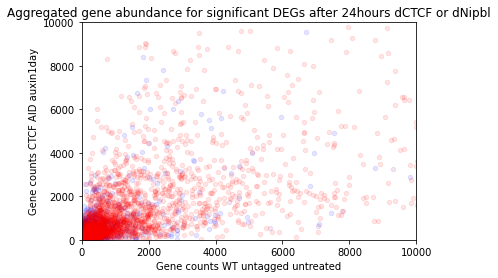

In [75]:
fig, ax = plt.subplots()
plt.title('Aggregated gene abundance for significant DEGs after 24hours dCTCF or dNipbl')
plt.xlabel('Gene counts WT untagged untreated')
plt.ylabel('Gene counts CTCF AID auxin1day')

print("number sig DEGs after 24 hours of depletion: " + str(len(any_sig))) 

# first plotting the DE that are significant for both datasets
both_sig = both.loc[np.where((both['padj_CTCF'] < 0.05) & (both['padj_NipBl'] < 0.05))]
print("number of significant DEGs in both groups: " + str(len(both_sig)))
both_ctcf_abundance = both_sig.merge(ctcf_kallisto_counts,
                                       on='gene',
                                       how='left')

both_nipbl_abundance = both_sig.merge(kallisto_counts,
                                on='gene',
                                how='left')

for ctcf, nipb in zip(ctcf_meta.loc[ctcf_meta['condition'] == 'CTCF_AID_auxin1day']['sample'], metadb.loc[metadb['treatment'] == 'dTAG-13 24h']['library']):
        ax.scatter(both_ctcf_abundance[ctcf], 
                both_nipbl_abundance[nipb], 
                s=20, alpha=0.1, color='purple', label='DE for both depletions')
        

# first plotting the DE that are significant for only dCTCF dataset
ctcf_sig = both.loc[np.where((both['padj_CTCF'] < 0.05) & (both['padj_NipBl'] >= 0.05))]
print("number of significant DEGs after 24hours dCTCF only: " + str(len(ctcf_sig)))
ctcf_sig_ctcf_abundance = ctcf_sig.merge(ctcf_kallisto_counts,
                                       on='gene',
                                       how='left')

ctcf_sig_nipbl_abundance = ctcf_sig.merge(kallisto_counts,
                                on='gene',
                                how='left')      
       
for ctcf, nipb in zip(ctcf_meta.loc[ctcf_meta['condition'] == 'CTCF_AID_auxin1day']['sample'], metadb.loc[metadb['treatment'] == 'dTAG-13 24h']['library']):
        ax.scatter(ctcf_sig_ctcf_abundance[ctcf], 
                ctcf_sig_nipbl_abundance[nipb], 
                s=20, alpha=0.1, color='blue', label='DEG after dCTCF')    
        
        
# plotting the DE that are significant for only dNipbl dataset
nipb_sig = both.loc[np.where((both['padj_CTCF'] >= 0.05) & (both['padj_NipBl'] < 0.05))]
print("number of significant DEGs after 24hours dNipBl only: " + str(len(nipb_sig)))
nipb_sig_ctcf_abundance = nipb_sig.merge(ctcf_kallisto_counts,
                                       on='gene',
                                       how='left')

nipb_sig_nipbl_abundance = nipb_sig.merge(kallisto_counts,
                                on='gene',
                                how='left')      
       
for ctcf, nipb in zip(ctcf_meta.loc[ctcf_meta['condition'] == 'CTCF_AID_auxin1day']['sample'], metadb.loc[metadb['treatment'] == 'dTAG-13 24h']['library']):
        ax.scatter(nipb_sig_ctcf_abundance[ctcf], 
                nipb_sig_nipbl_abundance[nipb], 
                s=20, alpha=0.1, color='red', label='DEG after dCTCF')   
        
        
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.show()

Notes: Trying to map gene abundances for significant genes 

- instead, will try get a ctcf_abundance and nipbl_abundance tables that have significant DEG in either category, then label the category as a group, then plot in scatter plot by extracting indices by group: https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option ? 
- probably not be a good measure, since each has different baselines. Logically, would be better to compare the change in DE between the two (but L2FC might not be right either)
- look into next steps to generate a PCA plot of both datasets together?

In [19]:

sig_loc = np.where((both['padj_CTCF'] < 0.05) | (both['padj_NipBl'] < 0.05))

sig = both.loc[sig_loc]

In [20]:
print(sig.shape)
sig.head(5)

(1288, 13)


,gene,baseMean_CTCF,log2FoldChange_CTCF,lfcSE_CTCF,stat_CTCF,pvalue_CTCF,padj_CTCF,baseMean_NipBl,log2FoldChange_NipBl,lfcSE_NipBl,stat_NipBl,pvalue_NipBl,padj_NipBl
3,ENSMUSG00000000031,27.699104,-0.329884,0.641314,-0.514388,0.606981,0.999976,50.489910,1.723420,0.416543,4.137436,0.000035,0.001251
4,ENSMUSG00000000037,330.518198,2.020011,0.509448,3.965098,0.000073,0.007284,196.342074,-0.561242,0.448194,-1.252232,0.210485,0.612838
6,ENSMUSG00000000056,670.116954,-0.126357,0.185398,-0.681547,0.495525,0.999976,871.917098,0.379189,0.116249,3.261877,0.001107,0.020174
14,ENSMUSG00000000120,581.938368,0.274466,0.348485,0.787598,0.430932,0.999976,2152.339630,0.689070,0.187539,3.674269,0.000239,0.005919
15,ENSMUSG00000000125,62.547196,0.164560,0.455484,0.361287,0.717885,0.999976,22.139246,3.345909,0.780020,4.289516,0.000018,0.000742


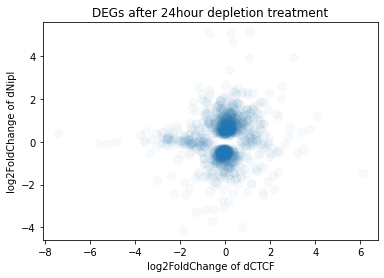

In [21]:
plt.title("DEGs after 24hour depletion treatment")
plt.xlabel("log2FoldChange of dCTCF")
plt.ylabel("log2FoldChange of dNipl")
plt.scatter(sig['log2FoldChange_CTCF'], sig['log2FoldChange_NipBl'], s=70, alpha=0.03)

(-6.0, 6.0)

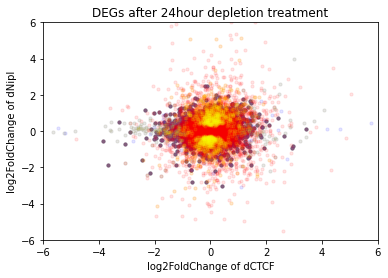

In [37]:
plt.title("DEGs after 24hour depletion treatment")
plt.xlabel("log2FoldChange of dCTCF")
plt.ylabel("log2FoldChange of dNipl")
nonsig = both.loc[np.where((both['padj_CTCF'] >= 0.05) & (both['padj_NipBl'] >= 0.05))]
plt.scatter(nonsig['log2FoldChange_CTCF'], nonsig['log2FoldChange_NipBl'], s=10, color='grey')

sigctcf = both.loc[np.where((both['padj_CTCF'] < 0.05) | (both['padj_NipBl'] >= 0.05))]
plt.scatter(sigctcf['log2FoldChange_CTCF'], sigctcf['log2FoldChange_NipBl'], s=10, color='blue', alpha=0.1)

signipbl = both.loc[np.where((both['padj_CTCF'] >= 0.05) | (both['padj_NipBl'] < 0.05))]
plt.scatter(signipbl['log2FoldChange_CTCF'], signipbl['log2FoldChange_NipBl'], s=10, color='red', alpha=0.1)

sigboth = both.loc[np.where((both['padj_CTCF'] < 0.05) | (both['padj_NipBl'] < 0.05))]
plt.scatter(sigboth['log2FoldChange_CTCF'], sigboth['log2FoldChange_NipBl'], s=10, color='yellow', alpha=0.1)
                    
plt.xlim(-6, 6)
plt.ylim(-6, 6)

In [36]:
#filtering dataset to get rid of huge outliers

both = both.loc[np.where(np.abs(both['log2FoldChange_CTCF']) < 6) & (np.abs(both['log2FoldChange_NipBl']) < 6)]

ValueError: setting an array element with a sequence.

 - include all genes in background, plus color-code dCTCf only, dNipbl only, both

## next steps for comparison:
 - maybe --> euclidean distance between the two sets using normalizes log transformation https://www.bioconductor.org/help/course-materials/2019/CSAMA/materials/labs/lab-03-rnaseq/rnaseqGene_CSAMA2019.html#sample-distances , https://bioc.ism.ac.jp/packages/2.14/bioc/vignettes/DESeq2/inst/doc/beginner.pdf
 - set up experimental design with all 4 conditions and all 4 datasets (WT-CTCF, WT-Nipl, treatments) and put in DESeq2
     - probably best way to perform PCA?
     - gene clustering (at end of bioc.vignette
     - MDS plot for sample distances --> Q: can I get these sample distances between the two dataset? Maybe I do the plot for each of the 4 comparisons with the abundances? 
     
 - comparison against promoter/enhancer dataset
 - CTCF at TSS
 
 
milestone for karissa:
- PCA with all combinations
- CTCF at TSS for dCTCF and dNipBl (with mm10) + dataset
- look into distance to enhancers with mm9 1st, with ctcf, then port over (with liftover) to mm10 
    - distance for dNipbl dataset to mm10 enhancer set

revisiting pipeline question:
- review differences between mapping tools, best practices in RNAseq + Differential Expression to help make decisions for building a snakemake 